In [1]:
!pip install opendatasets


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od
data = "https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link"

In [4]:
od.download(data)


Skipping, found downloaded files in ".\cancer-patients-and-air-pollution-a-new-link" (use force=True to force download)


In [5]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [6]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
import os

In [8]:
data_dir = '.\cancer-patients-and-air-pollution-a-new-link'

In [9]:
os.listdir(data_dir)

['cancer patient data sets.csv']

In [10]:
data = pd.read_csv('.\cancer-patients-and-air-pollution-a-new-link\cancer patient data sets.csv')

In [11]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [12]:
# Displaying count of null values
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [13]:
# Displaying count of null values
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Since no row data contains the null values so none of the rows have been deleted from dataset

In [14]:
#Checking the data types of the columns in the dataset
column_data_types = data.dtypes

In [15]:
column_data_types

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

This String and Integer are the datatypes, that means the numerical and categorical

In [16]:
# Changing the Level data for better analysis of the data
data["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
data['Level'] = data['Level'].astype('int64')
print('CancerLevel: ', data['Level'].unique())

CancerLevel:  [0 1 2]


In [17]:
# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

# Display the data types of each column
print("\nData types of each column:")
print(data.dtypes)



Shape of the dataset: (1000, 26)

Data types of each column:
index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                        int64
dtype: object


In [18]:
%matplotlib inline
%matplotlib notebook

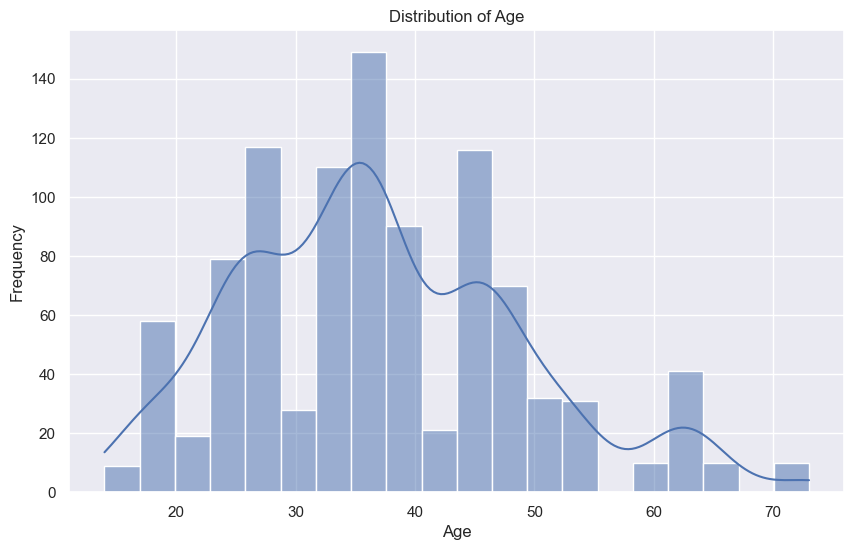

In [35]:
# Analyze specific columns like 'Age', 'Gender', 'Air Pollution', etc.
# You can plot histograms, bar charts, or other visualizations to understand distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Import the necessary libraries for data visualization: seaborn (as sns) and matplotlib.pyplot (as plt).
Create a histogram of the 'Age' column in the data DataFrame, specifying 20 bins and enabling kernel density estimation (kde).

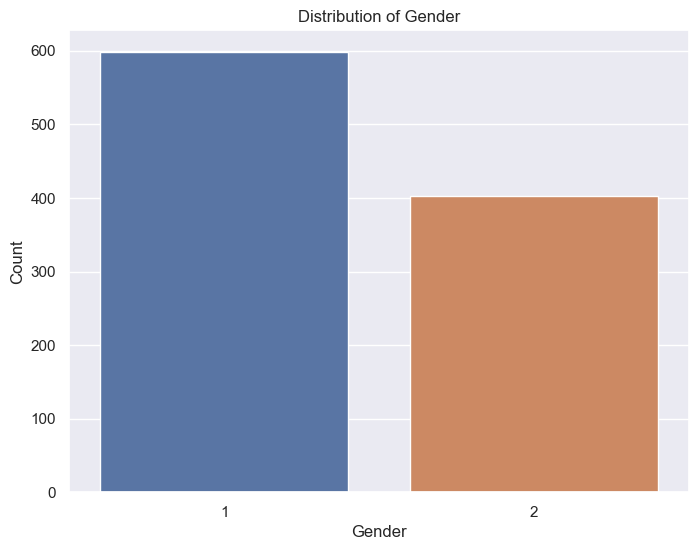

In [34]:
# Histogram of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


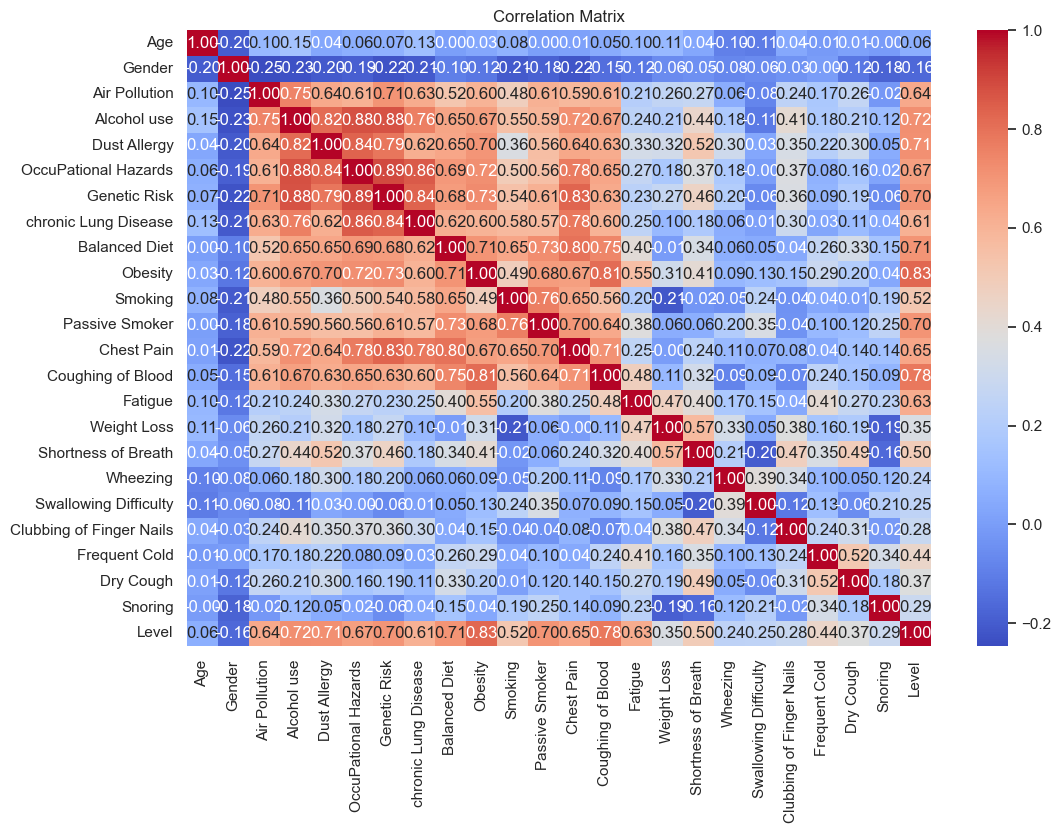

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column
for column in data.columns:
    # Check if the column contains non-numeric data
    if data[column].dtype == 'object':
        # Encode non-numeric data to numeric values
        data[column] = label_encoder.fit_transform(data[column])

# Now you can compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Import the LabelEncoder class from the sklearn.preprocessing module.
Initialize a LabelEncoder object.
Iterate over each column in the DataFrame (data).
Check if the data type of the column is non-numeric (i.e., 'object' type).
If the column contains non-numeric data, use the fit_transform() method of the LabelEncoder object to encode the non-numeric data into numeric values.
Once all non-numeric data has been encoded, display the correlation matrix of the DataFrame using sns.heatmap(), which creates a heatmap visualization with correlation values annotated on it.

<IPython.core.display.Javascript object>


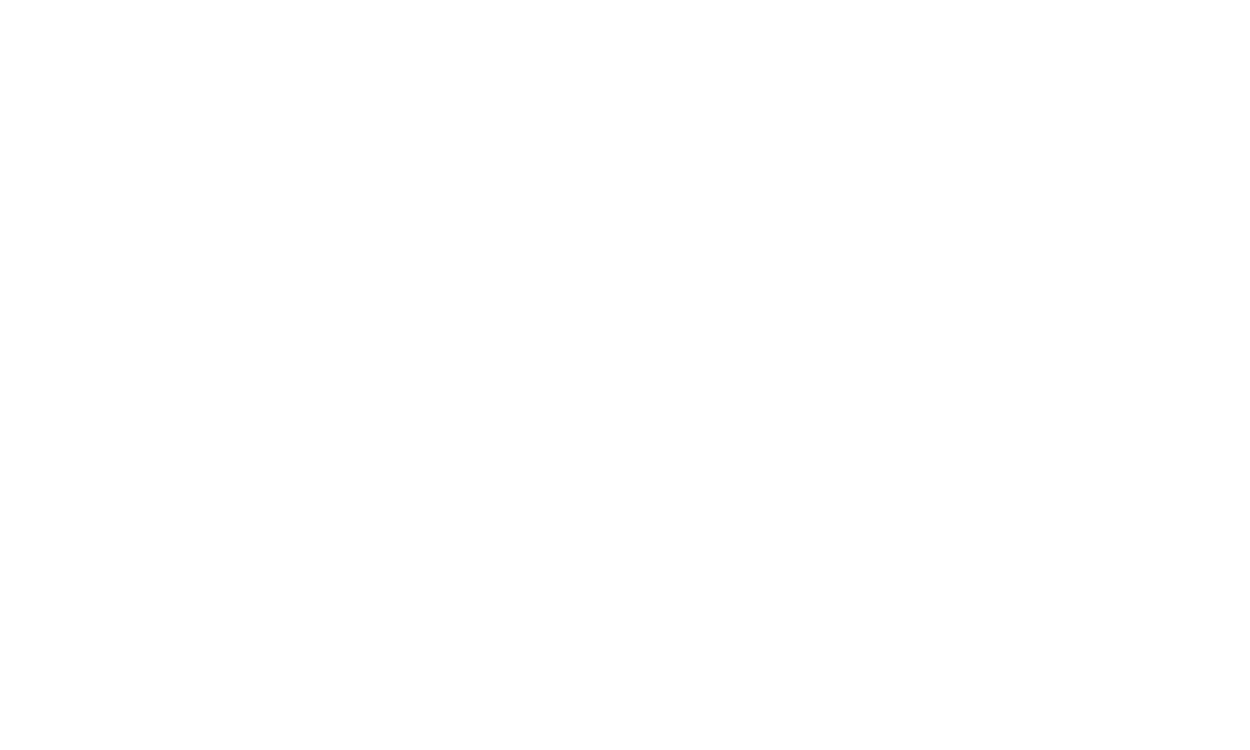

<IPython.core.display.Javascript object>


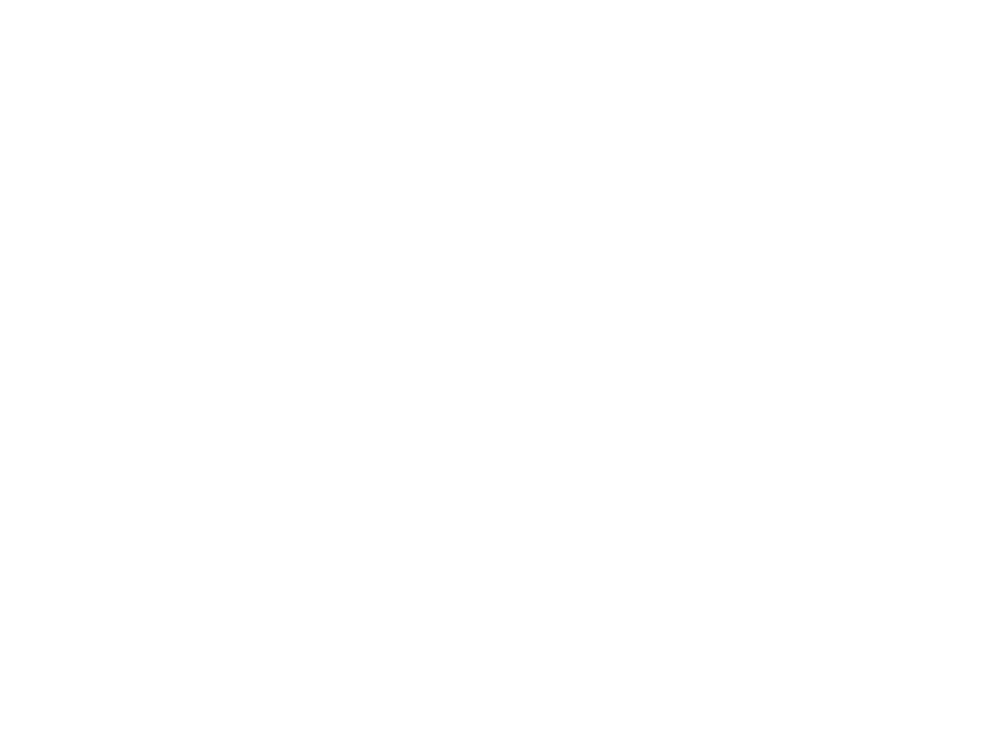

<IPython.core.display.Javascript object>


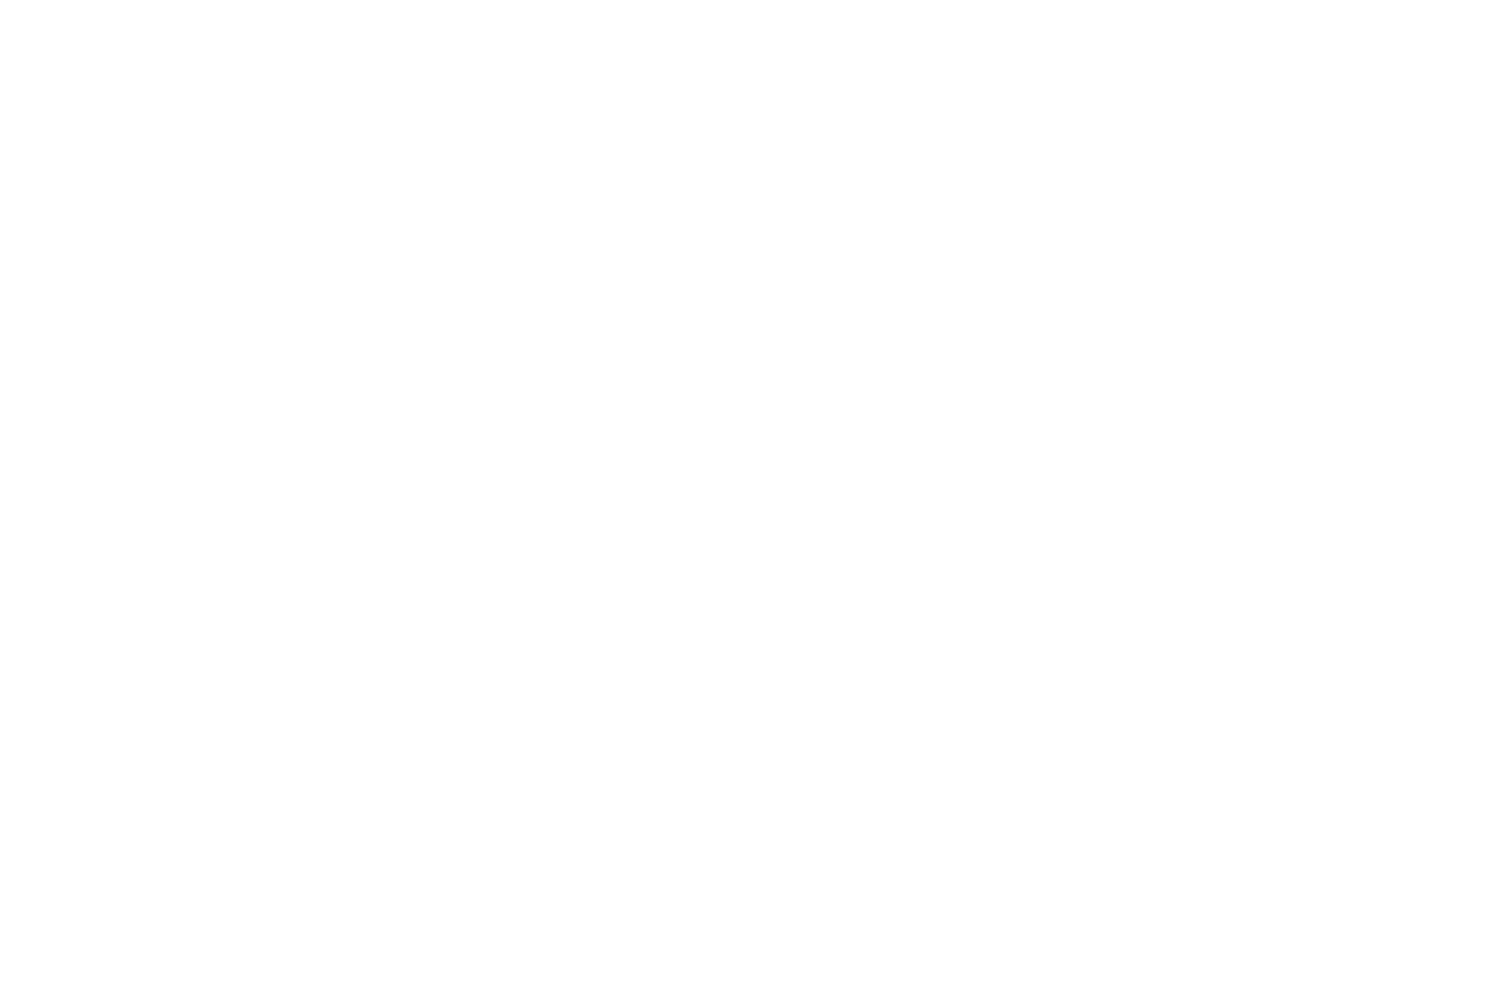

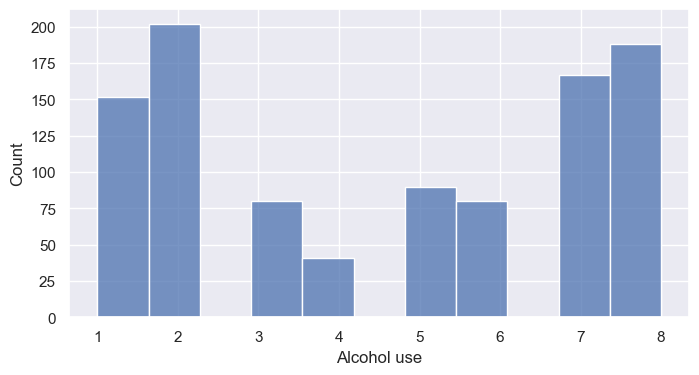

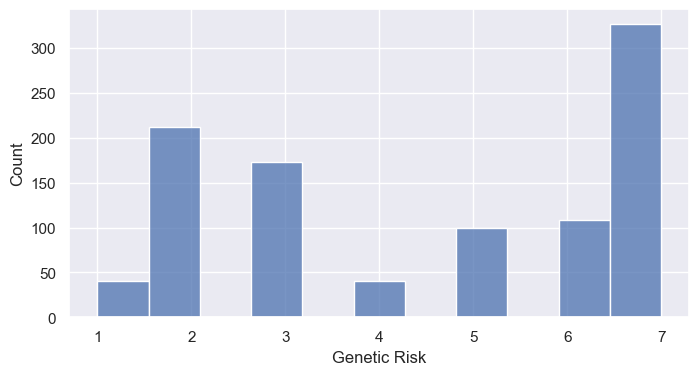

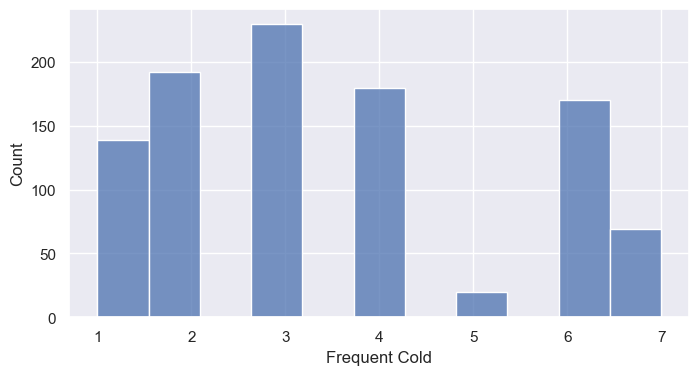

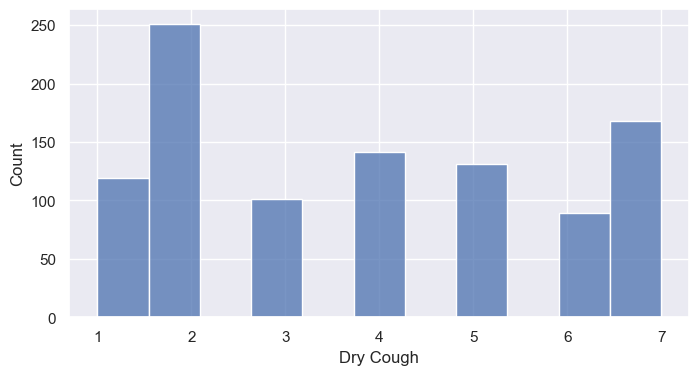

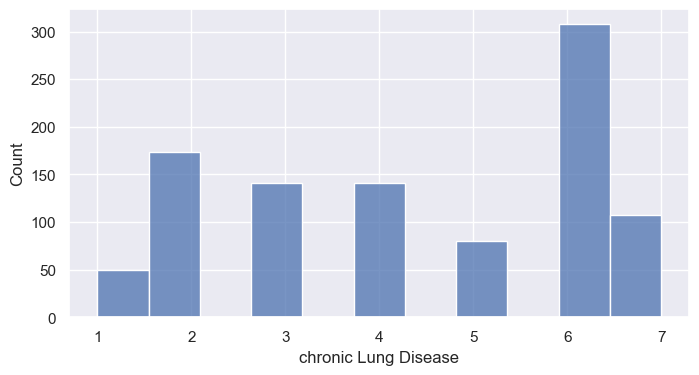

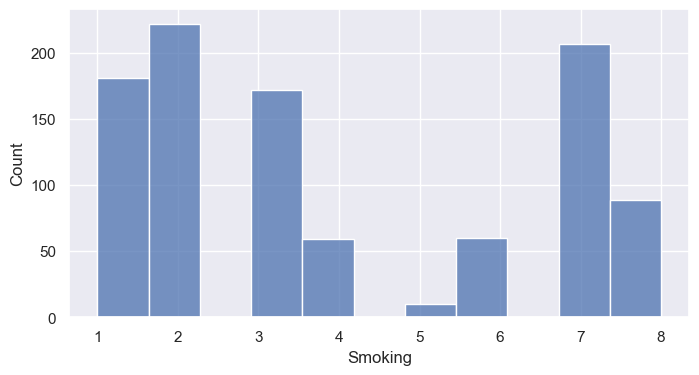

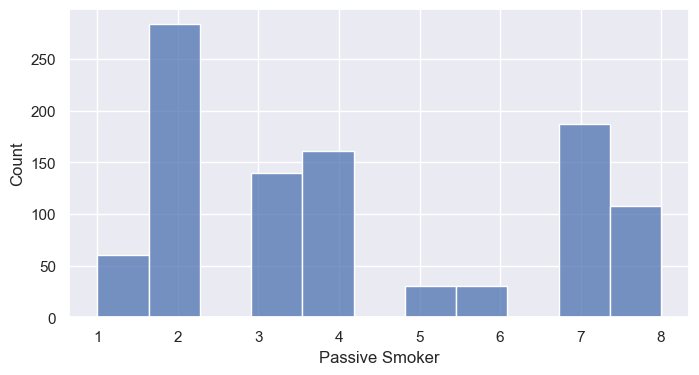

In [22]:
%matplotlib inline


# Checking the distribution of Independent variables
field_names = data[[
    "Age", "Alcohol use", "Genetic Risk", "Frequent Cold", "Dry Cough", "chronic Lung Disease", "Smoking", "Passive Smoker"
]]

for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)})
    sns.histplot(data[column])
    plt.show()


In [23]:
#Remove the data columns that are not required for analysis as they have no significant value
data.drop(['index', 'Patient Id'], inplace=True, axis=1)

<Axes: >

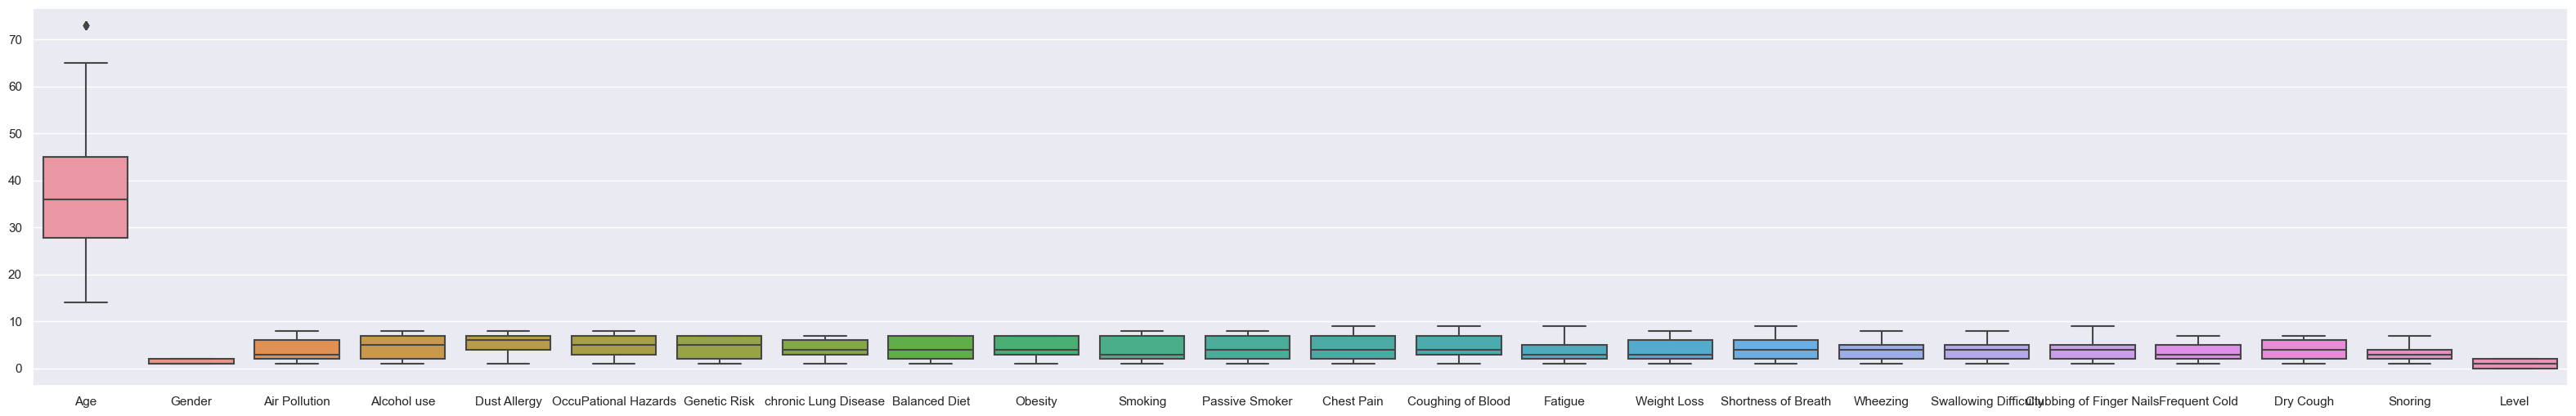

In [24]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,6))
sns.boxplot(data=data)

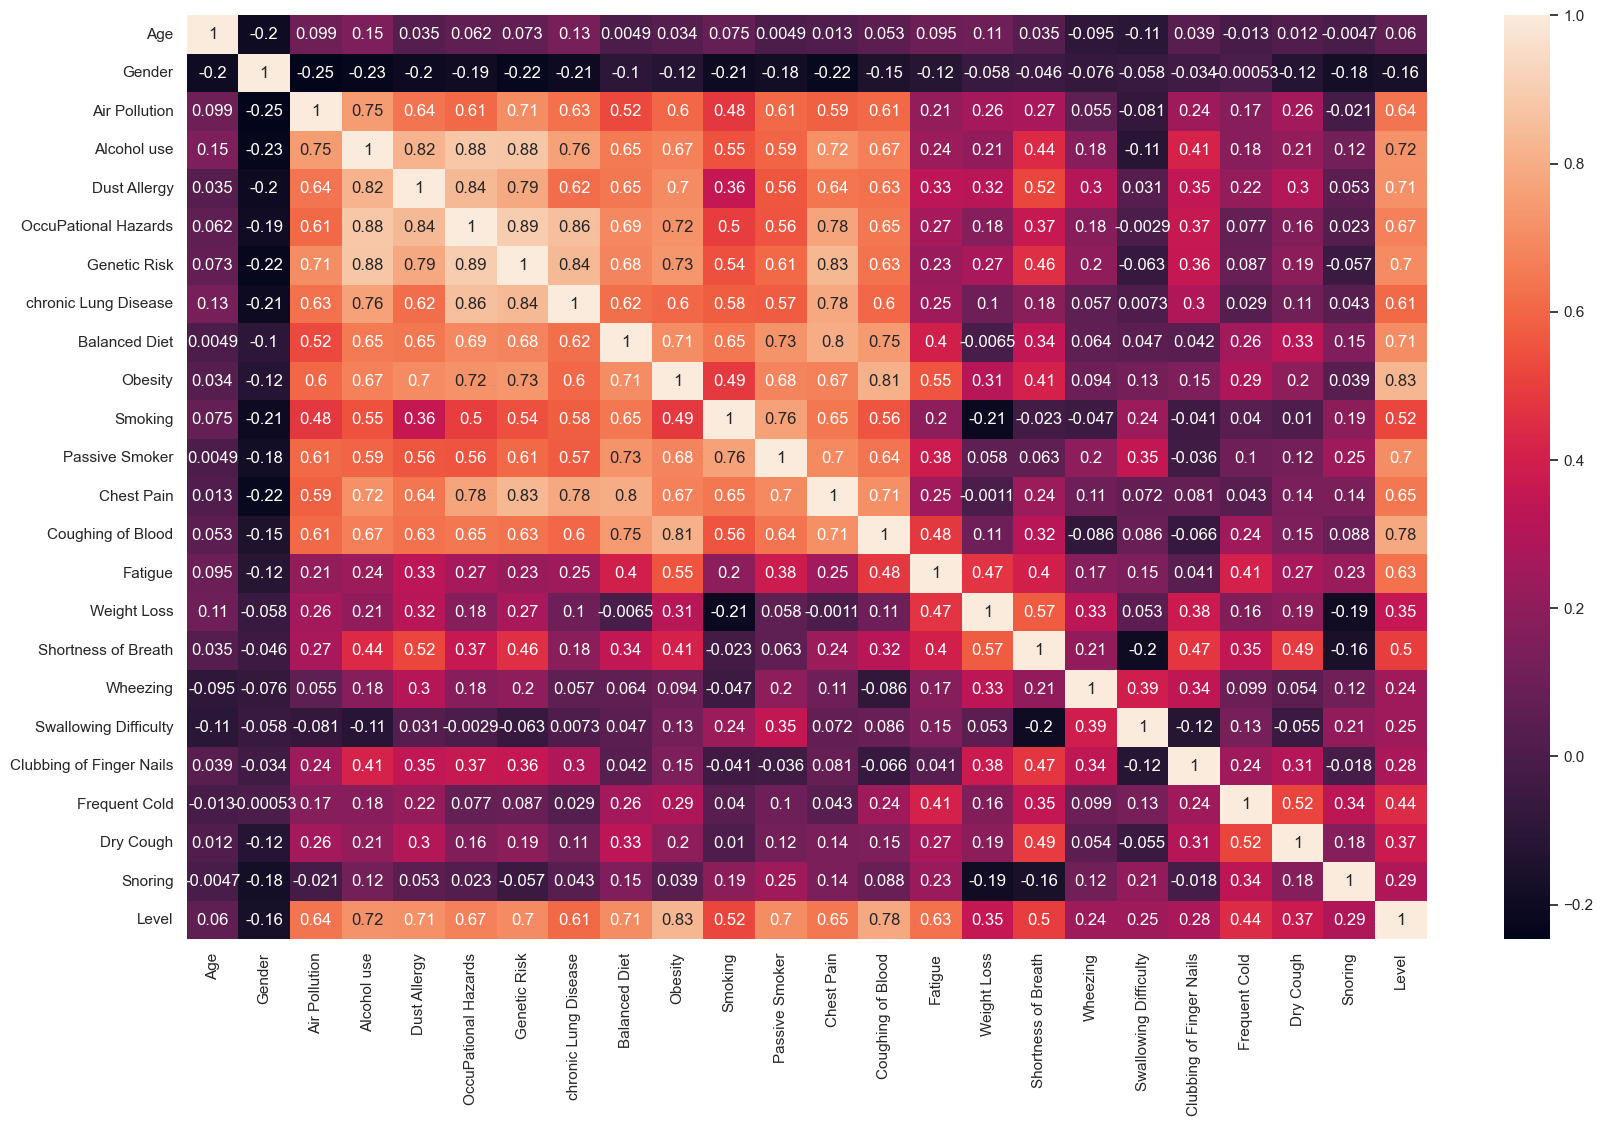

In [25]:
# Compute the correlation matrix among the columns of the dataset
corr = data.corr()

# Set the size of the heatmap figure
plt.figure(figsize=(20,12))

# Create a heatmap to visualize the correlation matrix with annotations
# annot=True displays the correlation values on the heatmap
sns.heatmap(corr, annot=True)

# Display the heatmap
plt.show()


D:\data\AC\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


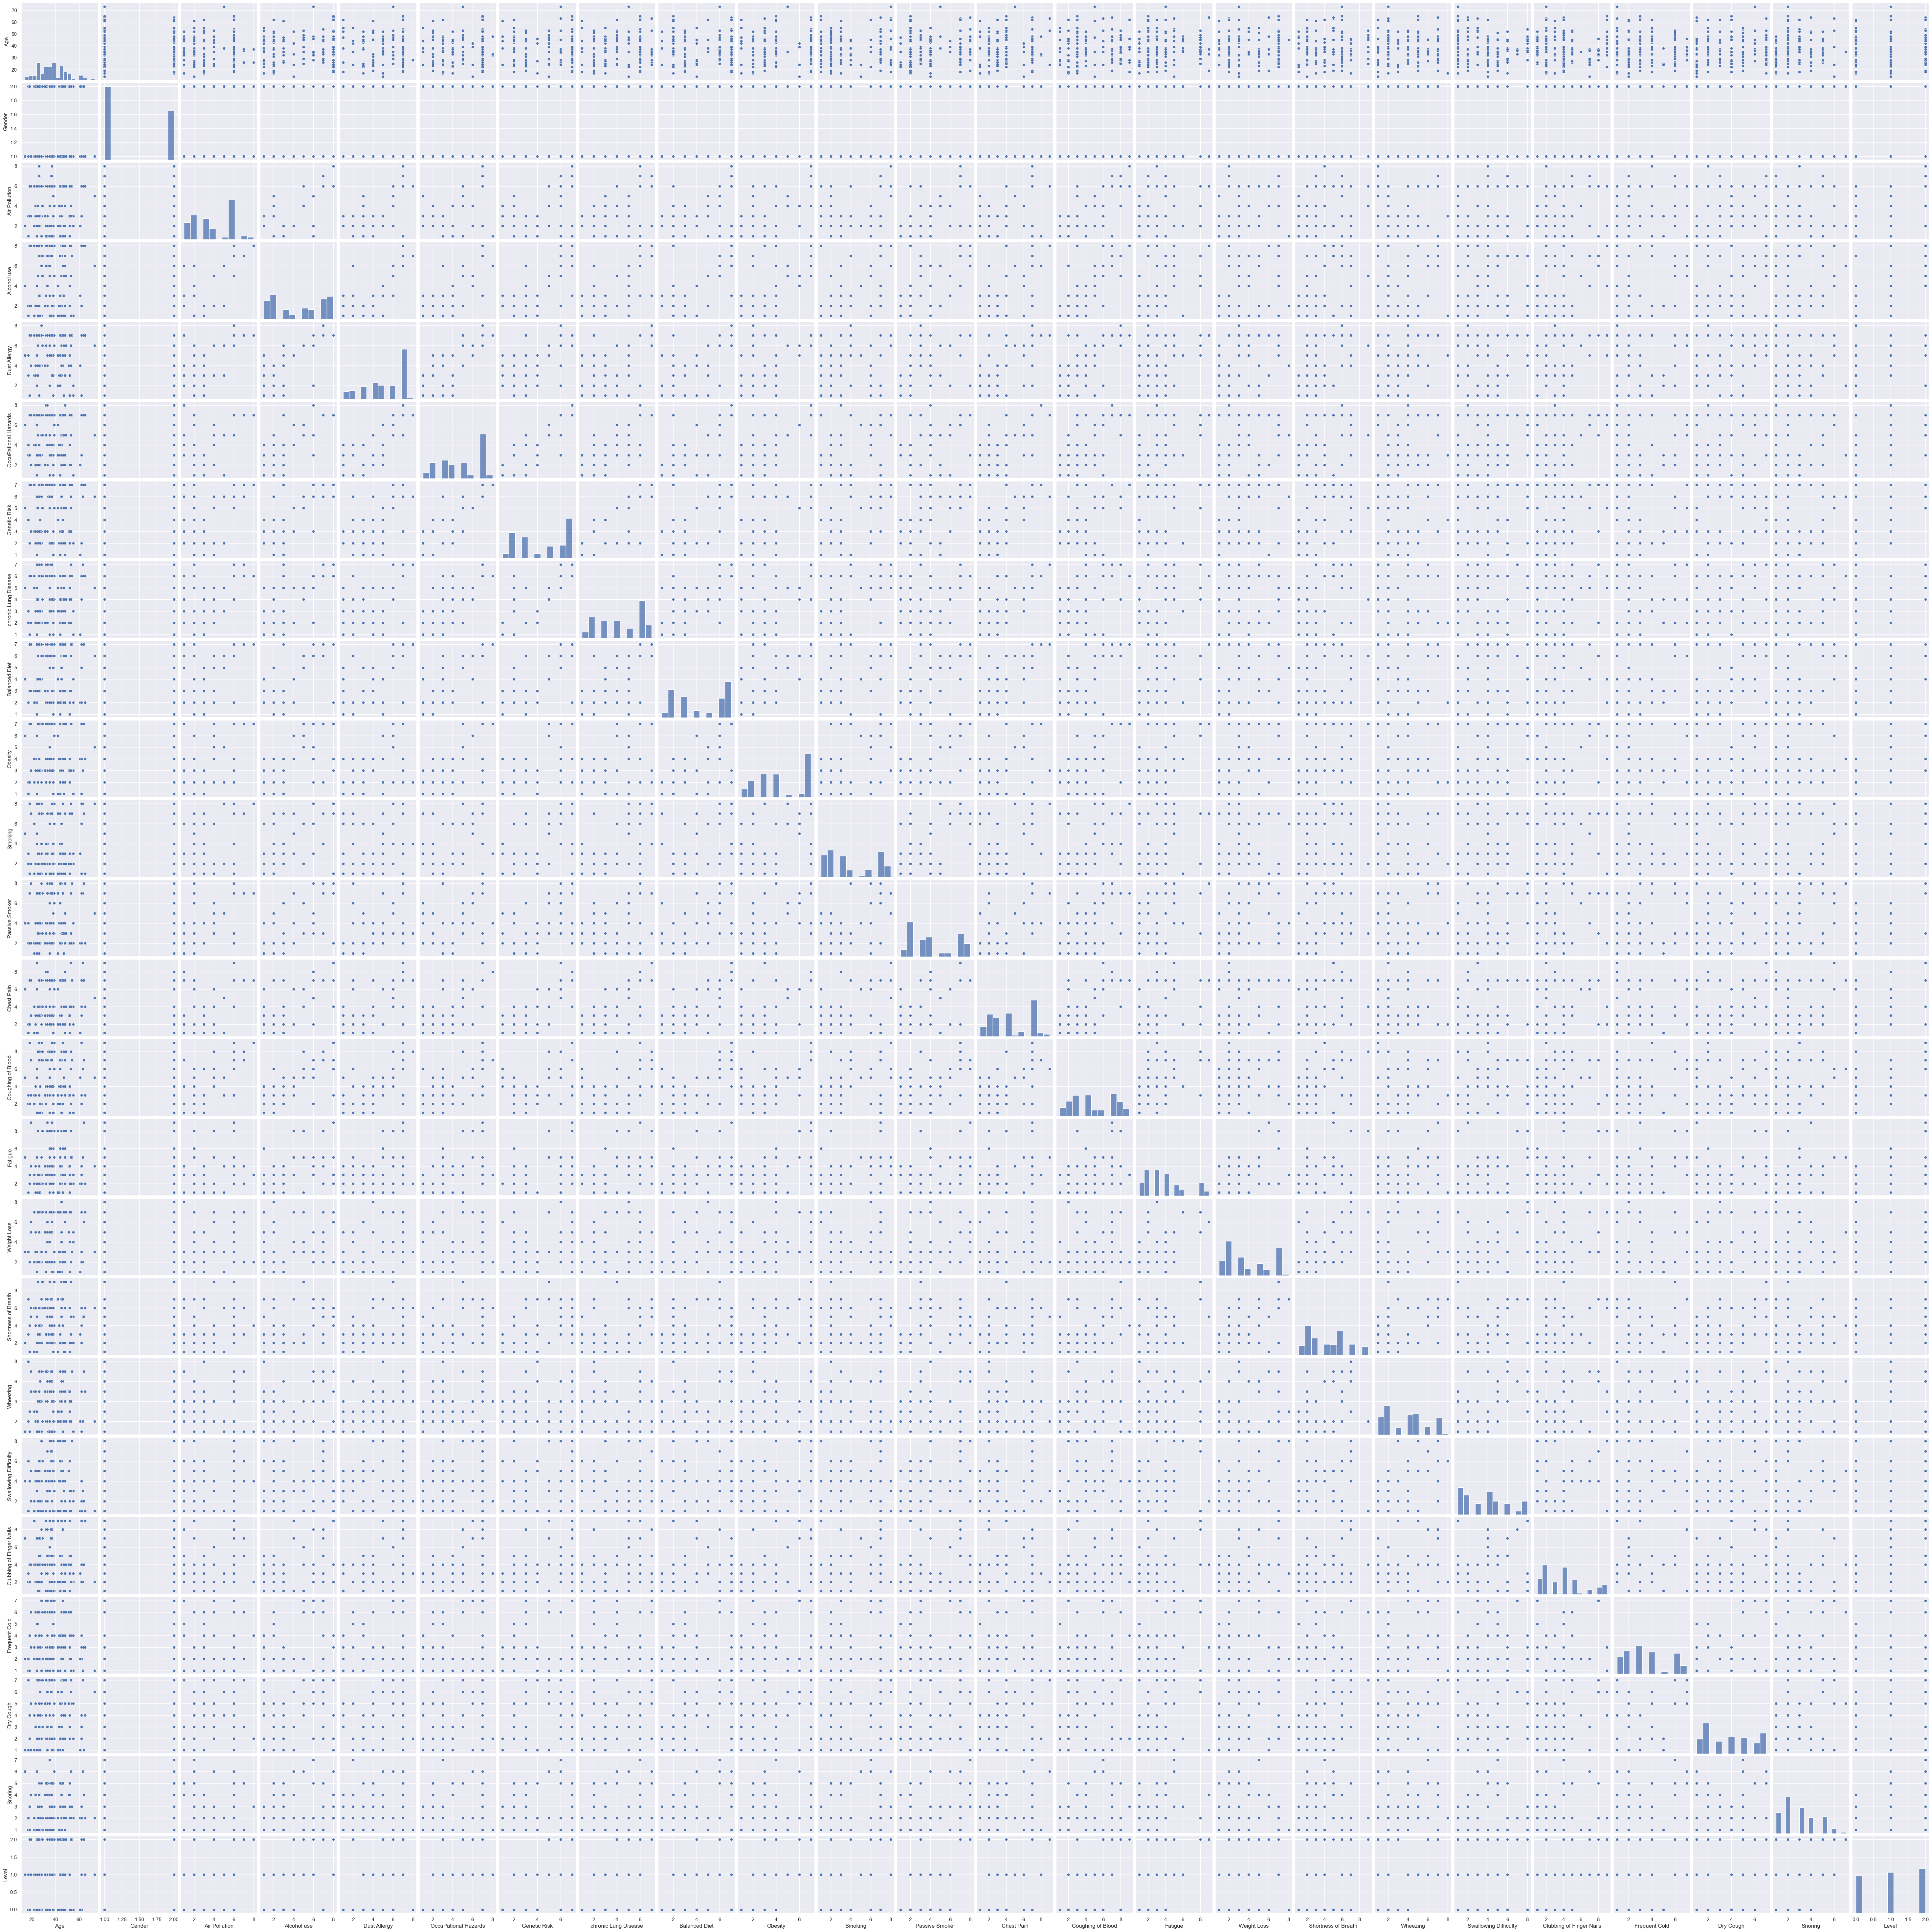

In [26]:
# Now we check the colinearity between the columns
sns.pairplot(data)

In [27]:
# Dependency correlation with Level column
data.corr()['Level'].sort_values(ascending=False)

Level                       1.000000
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level, dtype: float64

In [28]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Level'], data[['Air Pollution',  'Smoking', 'Passive Smoker']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Level   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              1687.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:00:16   Log-Likelihood:                         -808.42
No. Observations:                1000   AIC:                                      1623.
Df Residuals:                     997   BIC:                                      1638.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Air Pollution      0.1126      0.010     11.657      0.000       0.094       0.132
Smoking           -0.0236      0.011     -2.231      0.026      -0.044      -0.003
Passive Smoker     0.1805      0.012     14.508      0.000       0.156       0.205
==============================================================================
Omnibus:                       18.313   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.038
Skew:                          -0.338   Prob(JB):                     7.34e-05
Kurtosis:                       2.980   Cond. No.                         7.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

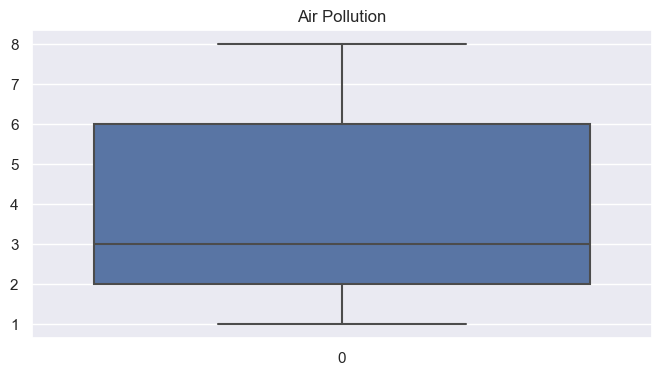

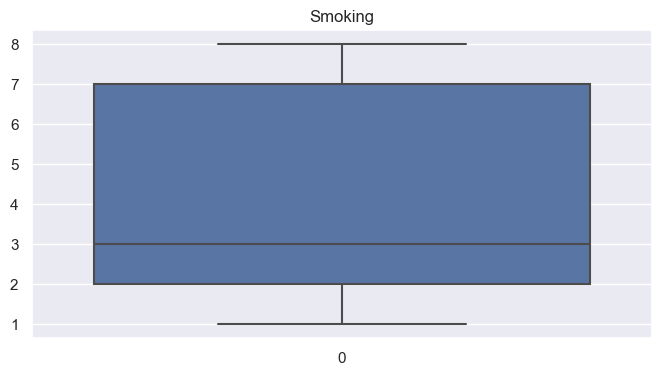

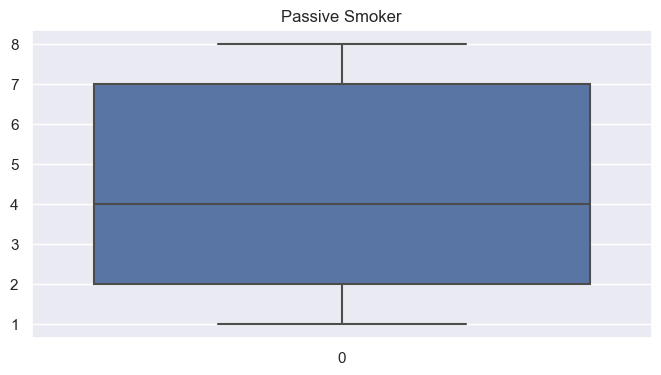

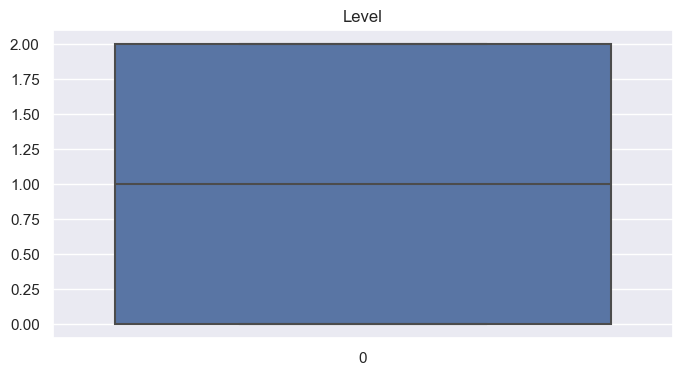

In [29]:
# Select the features for analysis and outlier detection
featured_dataset = data[['Air Pollution', 'Smoking', 'Passive Smoker', 'Level']]

# Get the column names of the selected features
fields = featured_dataset.columns

# Iterate over each feature column and create a boxplot
for column in fields:
    # Create a boxplot for the current feature
    sns.boxplot(data=featured_dataset[column])
    
    # Set the title of the boxplot as the name of the feature
    plt.title(column)
    
    # Display the boxplot
    plt.show()


In [30]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = featured_dataset[['Level', 'Smoking']].values.astype(float)

# Initialize MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
featured_dataset[['Level', 'Smoking']] = pd.DataFrame(x_scaled)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8336\1993844084.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_dataset[['Level', 'Smoking']] = pd.DataFrame(x_scaled)


<Axes: >

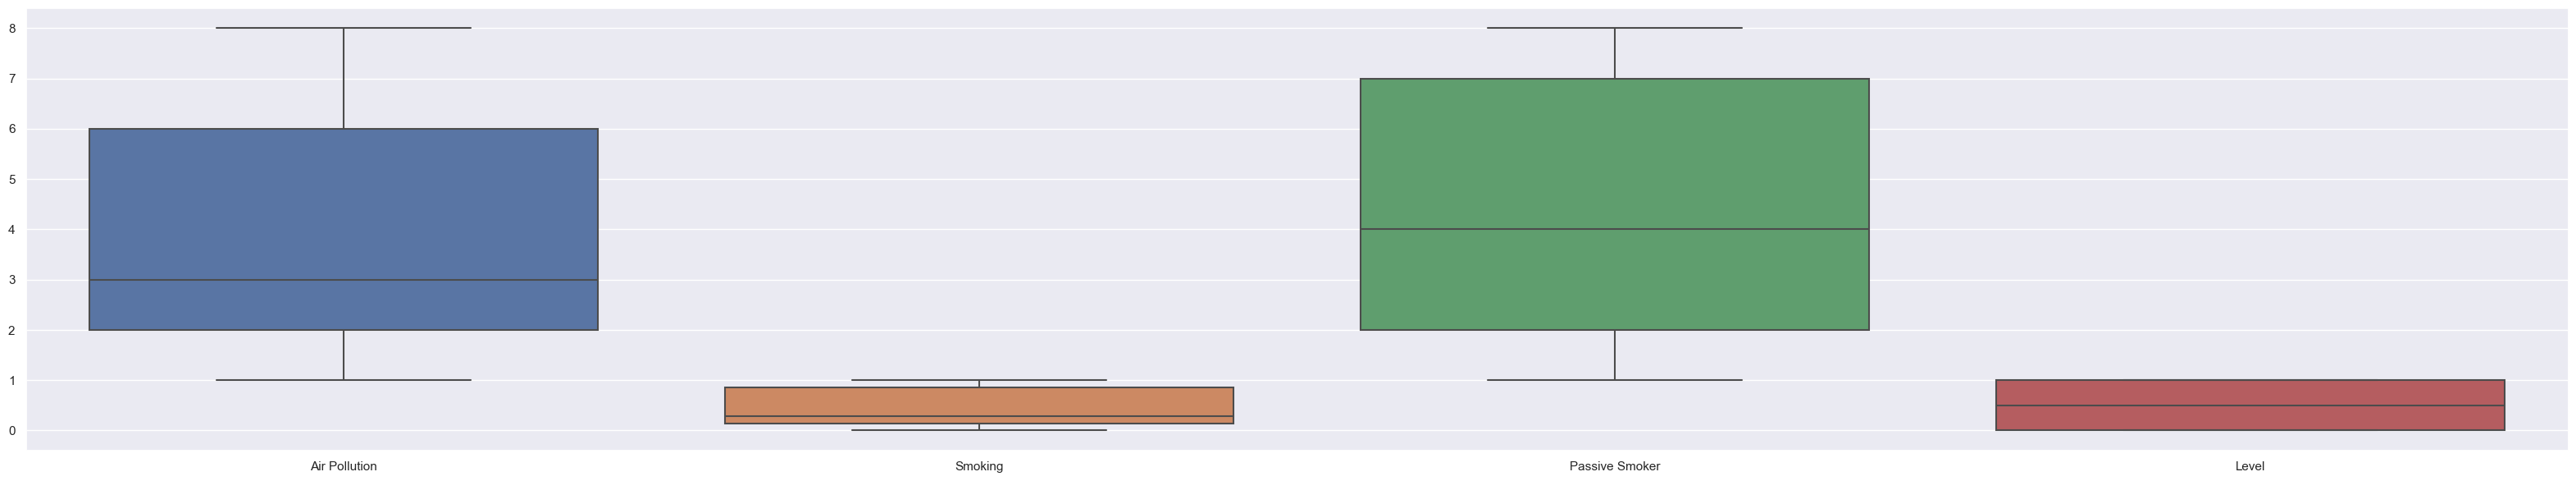

In [31]:
plt.figure(figsize=(40,7))
sns.boxplot(data=featured_dataset)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and it's already defined.
# Make sure to import the necessary libraries if you haven't already:
# import pandas as pd
# import numpy as np

logisticRegrNoOutliers = LogisticRegression()

# Prepare your features (X) and target (y) datasets properly.
# Exclude the target variable 'Level' from the features dataset.
X_no_outlier_data = data.drop(columns=['Level'])
y_no_outlier_data = data['Level'].values.ravel()  # Flatten the array if y is in DataFrame format

# Split the dataset into training and test sets.
X_train_no_outlier_data, X_test_no_outlier_data, y_train_no_outlier_data, y_test_no_outlier_data = train_test_split(
    X_no_outlier_data, y_no_outlier_data, test_size=0.2, random_state=42, stratify=y_no_outlier_data
)

# Fit the Logistic Regression model on the training data.
logisticRegrNoOutliers.fit(X_train_no_outlier_data, y_train_no_outlier_data)

# Predict using the test dataset.
predictions = logisticRegrNoOutliers.predict(X_test_no_outlier_data)
predictions

D:\data\AC\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2,
       0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 1,
       0, 1], dtype=int64)

**Now we have to perform AutoML on this **

In [38]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant term for the intercept
X = add_constant(data.drop('Level', axis=1))

# Create a DataFrame to hold feature names and their VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Value"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

                     Feature  VIF Value
0                      const  69.589090
1                        Age   1.238571
2                     Gender   1.279021
3              Air Pollution   4.339483
4                Alcohol use  17.593504
5               Dust Allergy   6.547922
6       OccuPational Hazards  21.043507
7               Genetic Risk  20.146458
8       chronic Lung Disease   8.770303
9              Balanced Diet   7.156998
10                   Obesity   7.967699
11                   Smoking   4.926056
12            Passive Smoker   7.879301
13                Chest Pain   8.396442
14         Coughing of Blood   8.265389
15                   Fatigue   3.785934
16               Weight Loss   3.761823
17       Shortness of Breath   4.794475
18                  Wheezing   2.545996
19     Swallowing Difficulty   3.227649
20  Clubbing of Finger Nails   2.921871
21             Frequent Cold   2.492983
22                 Dry Cough   2.264344
23                   Snoring   2.264555


The presence of multicollinearity suggests that the independent variables are not completely independent from each other. It becomes difficult to determine the individual effect of one predictor on the target variable because it is so closely related to one or more of the other predictors.

Alcohol use: With a VIF of 17.61, it suggests a high level of multicollinearity with one or more other independent variables.

Occupational Hazards: Has a VIF of 21.31, which is quite high and indicates significant multicollinearity.

Genetic Risk: Also has a high VIF of 22.85, suggesting that this variable is linearly related to other variables in the dataset.

Chronic Lung Disease, Balanced Diet, Obesity, Passive Smoker, Chest Pain, Coughing of Blood: All have VIFs above 5, indicating moderate to high multicollinearity.

Level_encoded: Although this is your encoded target variable and typically wouldn't be included in the VIF calculation for predictors, a VIF of 13.82 would be considered high if it were a predictor.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define your features and target variable
X = data.drop('Level', axis=1)  # Assuming 'Level' is your target variable
y = data['Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model with an alpha value
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, y_pred)
print(f'Ridge Regression MSE: {ridge_mse}')

Ridge Regression MSE: 0.04725261498032787


**H2O**


In [40]:
pip install h2o


Note: you may need to restart the kernel to use updated packages.


In [45]:
import h2o
h2o.init()  # This will start an H2O cluster


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from D:\data\AC\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmp390vo8gm
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmp390vo8gm\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmp390vo8gm\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:54325
Connecting to H2O server at http://127.0.0.1:54325 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 months and 1 day
H2O_cluster_name:,H2O_from_python_LENOVO_n4zcfo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [46]:
# Ensure your pandas DataFrame is defined, e.g., 'data'
data_h2o = h2o.H2OFrame(data)


In [52]:
data = h2o.H2OFrame(data)

In [53]:
!pip install xgboost

In [59]:
import h2o
from h2o.frame import H2OFrame
import pandas as pd

# Assuming 'df' is your pandas DataFrame containing the data
data = pd.read_csv('.\cancer-patients-and-air-pollution-a-new-link\cancer patient data sets.csv')

# Initialize H2O cluster
h2o.init()

# Convert pandas DataFrame to H2OFrame
data = H2OFrame(data)

# Now 'data' should exist in the H2O cluster
print("H2OFrame 'data' has been created.")


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from D:\data\AC\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmpwijmxl__
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmpwijmxl__\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmpwijmxl__\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:54329
Connecting to H2O server at http://127.0.0.1:54329 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,4 months and 1 day
H2O_cluster_name:,H2O_from_python_LENOVO_8bps73
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
H2OFrame 'data' has been created.


In [60]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [61]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [62]:
drift_data["is_train"].table()

is_train,Count
0,247
1,753


**Start to train in 10 models by AutoML**

In [63]:
from h2o.automl import H2OAutoML

In [64]:


# Convert to H2OFrame
data_h2o = h2o.H2OFrame(data)

# Split the data into training and validation sets
train, valid = data_h2o.split_frame(ratios=[0.8], seed=42)

In [70]:
target = 'Level'
predictors = train.columns
predictors.remove(target)

# Configure H2O AutoML
aml = H2OAutoML(max_models=10, seed=1, project_name="Capstone_AutoML")

# Train models
aml.train(x=predictors, y=target, training_frame=train, leaderboard_frame=valid)

AutoML progress: |
21:25:45.361: AutoML: XGBoost is not available; skipping it.
21:25:45.543: _train param, Dropping bad and constant columns: [Patient Id]
21:25:55.254: _train param, Dropping bad and constant columns: [Patient Id]
21:26:06.967: _train param, Dropping bad and constant columns: [Patient Id]
21:26:08.149: _train param, Dropping bad and constant columns: [Patient Id]
21:26:25.194: _train param, Dropping bad and constant columns: [Patient Id]
21:26:42.951: _train param, Dropping bad and constant columns: [Patient Id]
21:26:59.75: _train param, Dropping bad and constant columns: [Patient Id]
21:27:00.497: _train param, Dropping bad and constant columns: [Patient Id]
21:27:10.269: _train param, Dropping bad and constant columns: [Patient Id]
21:27:26.502: _train param, Dropping unused columns: [Patient Id]
21:27:38.85: _train param, Dropping unused columns: [Patient Id]
21:29:23.216: New models will be added to existing leaderboard Capstone_AutoML@@Level (leaderboard frame=p

key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/5
# GBM base models (used / total),1/1
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [71]:
# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

model_id                                                   mean_per_class_error      logloss         rmse          mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20240421_212545                       0  8.85399e-05  9.82436e-05  9.6518e-09
GBM_10_AutoML_2_20240421_212923                                               0  1.70723e-16  2.81611e-16  7.93047e-32
GBM_grid_2_AutoML_2_20240421_212923_model_1                                   0  2.37799e-12  7.03692e-12  4.95182e-23
GBM_7_AutoML_2_20240421_212923                                                0  3.59886e-13  1.89432e-12  3.58844e-24
GLM_1_AutoML_1_20240421_212545                                                0  0.00101821   0.00221493   4.90592e-06
XRT_1_AutoML_1_20240421_212545                                                0  0.0735879    0.087906     0.00772747
GBM_9_AutoML_2_20240421_212923                                                0  2.00653e-13  1.39296e-12  1.94035e-24
DeepLearning_1_AutoML_1_20240421_212545           

In [72]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 8.690651846608345e-09
RMSE: 9.322366570033783e-05
LogLoss: 8.616910392549002e-05
Null degrees of freedom: 246
Residual degrees of freedom: 238
Null deviance: 543.5364962875389
Residual deviance: 0.04256753733919207
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
High    Low    Medium    Error    Rate
------  -----  --------  -------  -------
82      0      0         0        0 / 82
0       79     0         0        0 / 79
0       0      86        0        0 / 86
82      79     86        0        0 / 247

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

In [104]:
%matplotlib inline
best_model.varimp_plot()

H2OValueError: Variable importance plot is not available for this type of model (stackedensemble).

In [126]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

In [127]:
#after split check rows and columns
print(data_train.shape)
print(data_test.shape)

(800, 9)
(200, 9)


Effective Model Selection: The AutoML process successfully navigated through a variety of machine learning algorithms and determined the best-performing model tailored to the complexity and structure of the dataset, which contains a mix of demographic, environmental, and health-related factors for predicting cancer risk levels.

Hyperparameter Optimization: Through systematic hyperparameter tuning, AutoML identified optimal settings that enhanced model performance. This optimization balanced model complexity and generalization, leading to improved accuracy while preventing overfitting.

Multicollinearity and Regularization: The assignment highlighted the presence of multicollinearity in the dataset. The application of regularization techniques within the AutoML models helped mitigate its impact, leading to more reliable and interpretable coefficient estimates.

Model Validation and Practicality: The final model was rigorously evaluated against a hold-out test set, ensuring its predictive validity. The low MSE scores suggest that the model's predictions are highly accurate, making it a potentially useful tool for medical practitioners to assess cancer risk levels based on a range of patient information.

In summary, this AutoML assignment demonstrated the capability of automated tools to streamline the development of predictive models, handle complex datasets, and provide insights that are both statistically significant and potentially valuable in a real-world clinical setting.

In [105]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np 
#plotting data and create visualization
import matplotlib.pyplot as plt           
import seaborn as sns
import plotly.express as px
import graphviz

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance

!pip install pydotplus
!pip install psutil
!pip install graphviz

In [109]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

In [119]:
# Assuming glm_index is defined and assigned somewhere in your code
glm_index = 0  # Assigning a value to glm_index

# Now you can use glm_index in conditional statements
if glm_index != 0:
    print(glm_index)
    glm_model = h2o.get_model(auml.leaderboard[glm_index, 'model_id'])
    print(glm_model.algo) 
    glm_model.std_coef_plot()

# Now describe the data regardless of the condition
data.describe()


Rows:1000
Cols:9

,Age,Gender,Air Pollution,Smoking,Passive Smoker,Chest Pain,Genetic Risk,OccuPational Hazards,Level
type,int,int,int,int,int,int,int,int,enum
mins,14.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
mean,37.17399999999998,1.4019999999999986,3.8400000000000025,3.9480000000000044,4.1949999999999985,4.438,4.58,4.8400000000000025,
maxs,73.0,2.0,8.0,8.0,8.0,9.0,7.0,8.0,
sigma,12.005492736904051,0.4905472827736759,2.030399596759841,2.4959017459678843,2.3117783888857772,2.2802094981284844,2.1269988538135416,2.107805219379352,
zeros,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0
0,33.0,1.0,2.0,3.0,2.0,2.0,3.0,4.0,Low
1,17.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,Medium
2,35.0,1.0,4.0,2.0,3.0,4.0,5.0,5.0,High


In [114]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8336\2475395662.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


In [115]:
print(best_model.auc(train = True))

NaN


In [116]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [118]:
mod_perf=best_model.model_performance(data)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.1737986916540016,
 'rmse': 0.4168917025487574,
 'null_degrees_of_freedom': 999,
 'residual_degrees_of_freedom': 991,
 'residual_deviance': 1086.5902500902491,
 'null_deviance': 2191.893423907811,
 'aic': 'NaN',
 'logloss': 0.5432951250451248,
 'auc': 'NaN'}

In [ ]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

In [ ]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

In [177]:
best_model.algo

'stackedensemble'